# Plot market factors of financial time series (FTS)

In [1]:
import os
import re
import sys
import warnings
import pandas as pd  # type: ignore

sys.path.append('../modules')
import plot_market_factors as pmf  # type: ignore  # noqa: E402

warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
# pd.options.display.max_rows = 277

## Global variables

In [2]:
input_path_raw = "../input_files/raw_data"
input_path_processed = "../input_files/processed_data"
input_path_data_dictionary = "../input_files/data_dictionary"
log_path = "../logs"
output_path = "../output_files"
input_generation_date = "2024-08-31"
igd = re.sub("-", "", input_generation_date)
stock_index_name = "fchi"

save_figures = True
usetex = True

In [3]:
output_path_local = "{}/{}".format(output_path, re.sub("-", "", input_generation_date))
output_path_components = "{}/components".format(output_path_local)
output_path_edge_distribution = "{}/edge_distribution".format(output_path_local)

if os.path.exists(output_path_local) is False:
    os.mkdir(output_path_local)
if os.path.exists(output_path_components) is False:
    os.mkdir(output_path_components)
if os.path.exists(output_path_edge_distribution) is False:
    os.mkdir(output_path_edge_distribution)

## Load data and filter duplicates by symbol and date

In [4]:
df_normalized = pd.read_csv("{}/df_{}_rolling_window_{}.csv".format(output_path, stock_index_name, igd), low_memory=False)  # noqa: E501
df_residuals = pd.read_csv("{}/df_{}_rolling_window_residuals_{}.csv".format(output_path, stock_index_name, igd), low_memory=False)  # noqa: E501

# Transform dates
df_normalized["final_date"] = pd.to_datetime(df_normalized["final_date"], errors="coerce")  # noqa: E501
df_residuals["final_date"] = pd.to_datetime(df_residuals["final_date"], errors="coerce")  # noqa: E501

In [5]:
mask_1 = ((df_normalized["alpha"].isin([0.10, 0.05])) & (df_normalized["level"] == df_normalized["level"].max()))  # noqa: E501
mask_2 = ((df_residuals["alpha"].isin([0.10, 0.05])) & (df_residuals["level"] == df_residuals["level"].max()))  # noqa: E501
df_normalized = df_normalized[mask_1]
df_residuals = df_residuals[mask_2]

## Plot number of factors

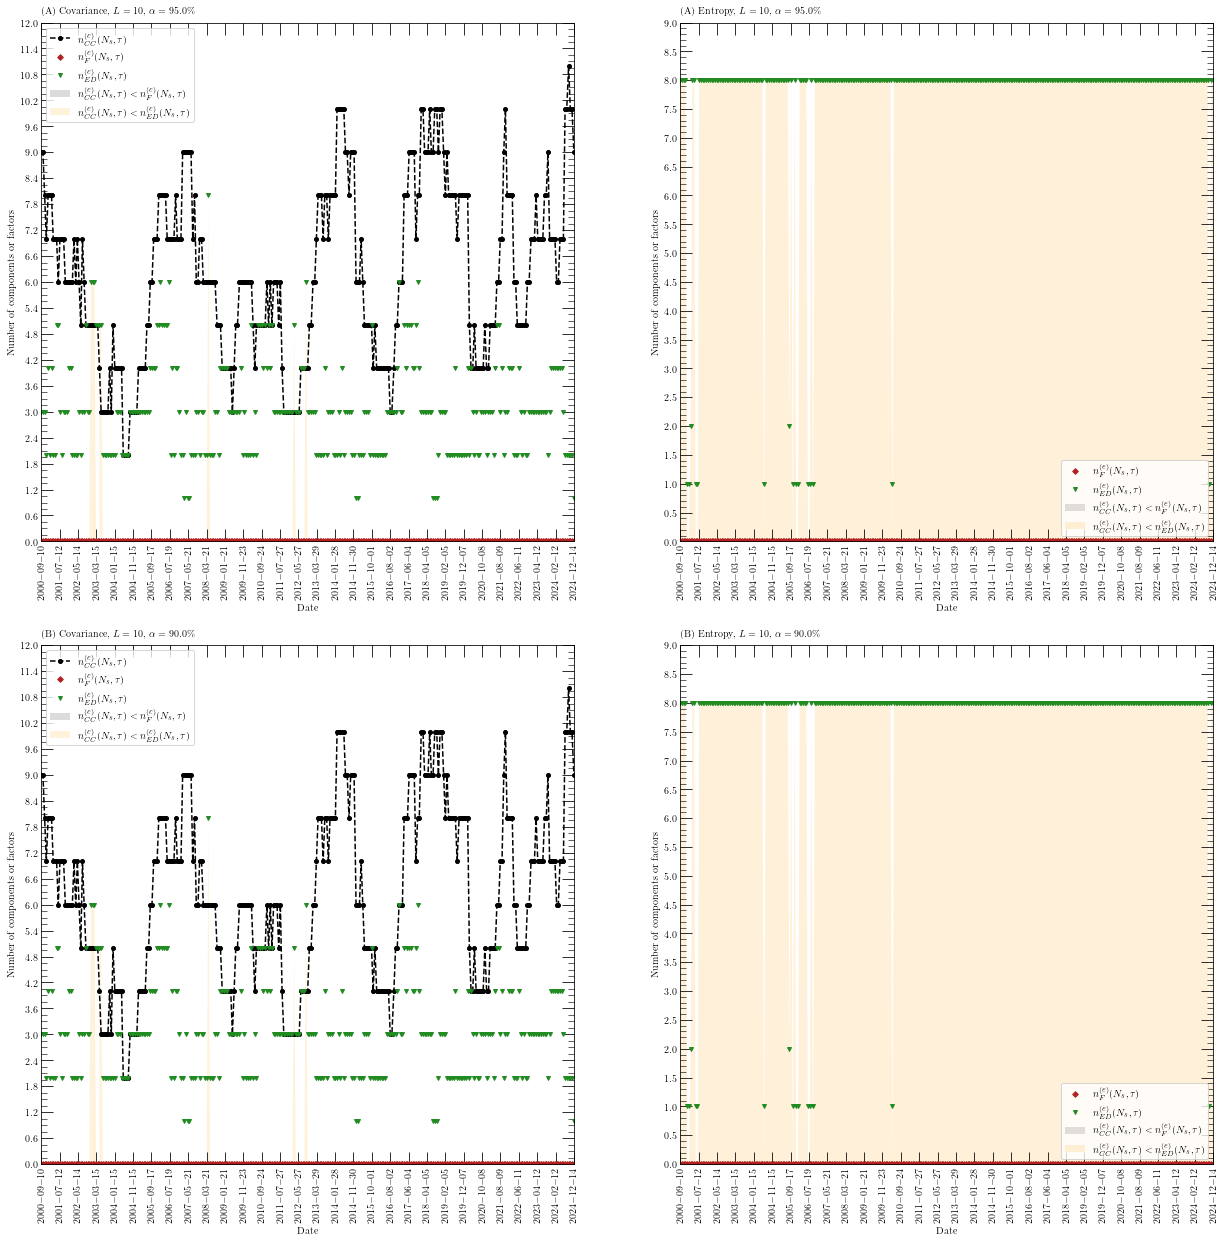

0

In [6]:
pmf.plot_market_efficiency(
    df=df_normalized,
    width=21,
    height=21,
    fontsize_labels=10,
    fontsize_legend=10,
    n_cols=1,
    marker_size=4,
    n_x_breaks=30,
    n_y_breaks=20,
    fancy_legend=True,
    usetex=usetex,
    dpi=300,
    save_figures=save_figures,
    output_path=output_path_components,
    information_name="{}".format(stock_index_name),
    input_generation_date=input_generation_date
)

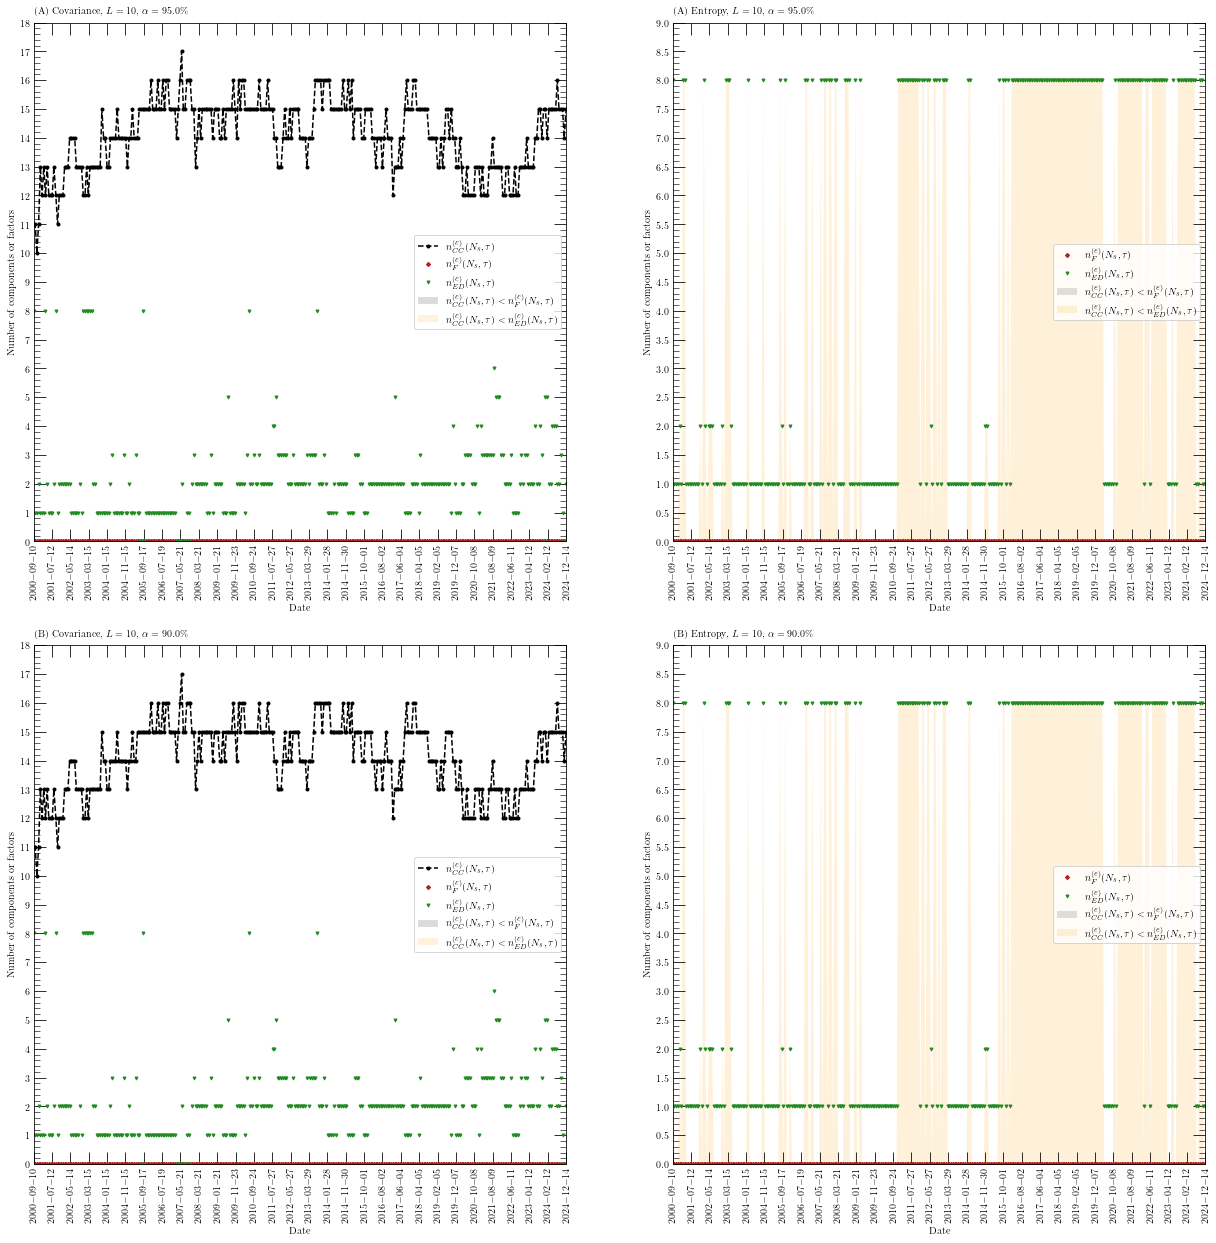

0

In [7]:
pmf.plot_market_efficiency(
    df=df_residuals,
    width=21,
    height=21,
    fontsize_labels=10,
    fontsize_legend=10,
    n_cols=1,
    marker_size=3,
    n_x_breaks=30,
    n_y_breaks=20,
    fancy_legend=True,
    usetex=usetex,
    dpi=300,
    save_figures=save_figures,
    output_path=output_path_components,
    information_name="{}_residuals".format(stock_index_name),
    input_generation_date=input_generation_date
)

## Plot edge distribution

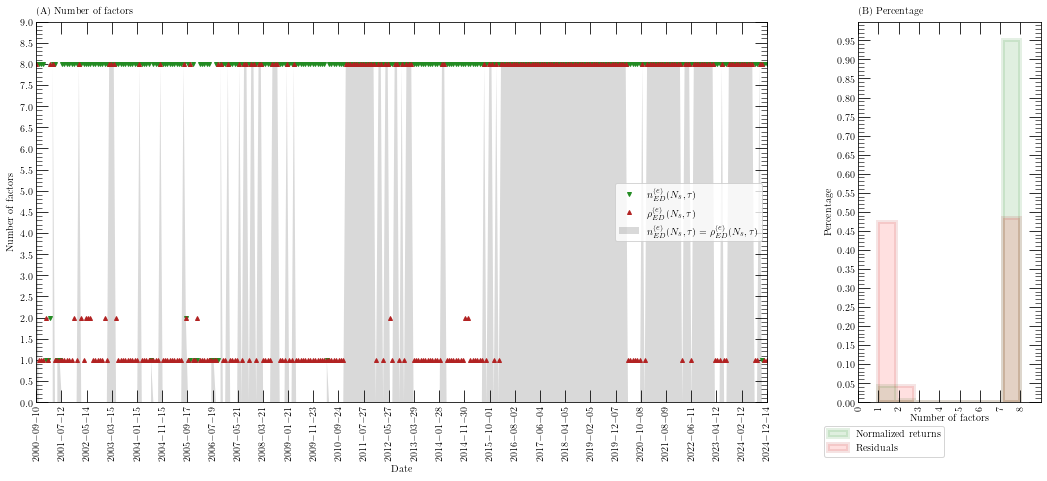

0

In [8]:
# from importlib import reload
# reload(pmf)

pmf.plot_market_efficiency_entropy(
    df_normalized=df_normalized,
    df_residuals=df_residuals,
    k_max=8,
    width_ratio=4,
    width=18,
    height=7,
    fontsize_labels=10,
    fontsize_legend=10,
    n_cols=1,
    marker_size=4,
    n_x_breaks=30,
    n_y_breaks=20,
    fancy_legend=True,
    usetex=usetex,
    dpi=400,
    save_figures=save_figures,
    output_path=output_path_edge_distribution,
    information_name="{}".format(stock_index_name),
    input_generation_date=input_generation_date
)